In [1]:
import numpy as np
import pandas as pd


#### Data preprocessing with pandas
#### Read the data from csv file

In [2]:
df_covid=pd.read_csv('COVID-19_formatted_dataset.csv', index_col=0)

In [3]:
df_covid.head()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW)
1,17,negative,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073
8,1,negative,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899
15,9,negative,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355
18,11,negative,0.991838,0.792188,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035
22,9,negative,0.190738,-0.147652,-0.668155,1.020415,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318


#### 2(b) Read selected columns (15 attributes) and the label ('SARS-Cov-2 exam result'). Note – Ignore the first column (Index)


In [4]:
df_covid.shape

(598, 16)

#### Map the label {negative:0, positive:1}

In [5]:
df_covid['SARS-Cov-2 exam result'] = df_covid['SARS-Cov-2 exam result'].map({'negative': 0, 'positive': 1})

In [6]:
df_covid['SARS-Cov-2 exam result']

1       0
8       0
15      0
18      0
22      0
       ..
5602    0
5614    0
5615    0
5618    0
5643    1
Name: SARS-Cov-2 exam result, Length: 598, dtype: int64

#### 2(d) Form a numpy array

In [7]:
X = df_covid.drop('SARS-Cov-2 exam result', axis =1).values

In [8]:
X.shape

(598, 15)

In [ ]:
Y = df_covid['SARS-Cov-2 exam result'].values
Y[:5]

In [10]:
df= df_covid.values
type(df)

numpy.ndarray

#### Splitting dataset for training and testing of model

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [13]:
Feature = list(df_covid.columns)

Feature.remove('SARS-Cov-2 exam result')

Feature

['Patient age quantile',
 'Hematocrit',
 'Hemoglobin',
 'Platelets',
 'Mean platelet volume ',
 'Red blood Cells',
 'Lymphocytes',
 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Leukocytes',
 'Basophils',
 'Mean corpuscular hemoglobin (MCH)',
 'Eosinophils',
 'Mean corpuscular volume (MCV)',
 'Monocytes',
 'Red blood cell distribution width (RDW)']

#### histogram

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 864x576 with 0 Axes>

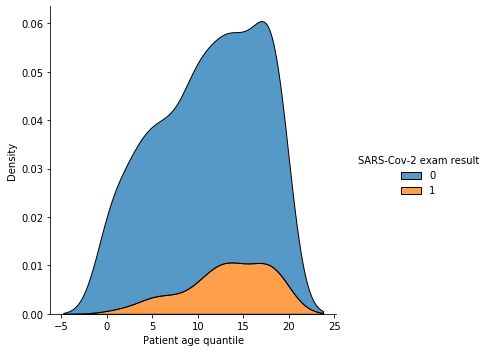

<Figure size 864x576 with 0 Axes>

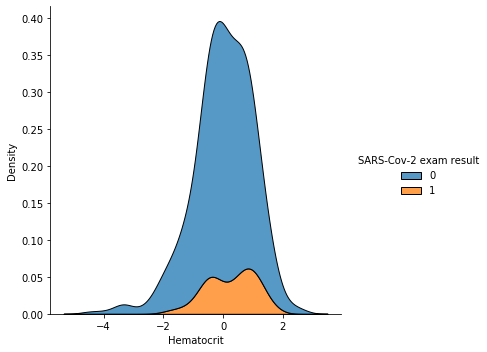

<Figure size 864x576 with 0 Axes>

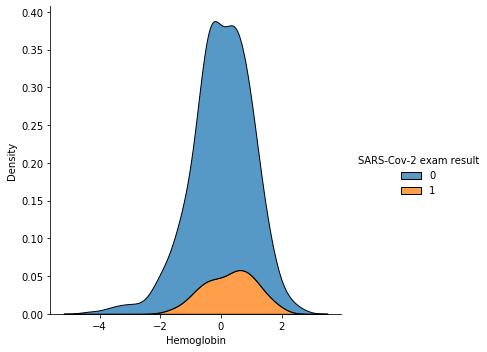

<Figure size 864x576 with 0 Axes>

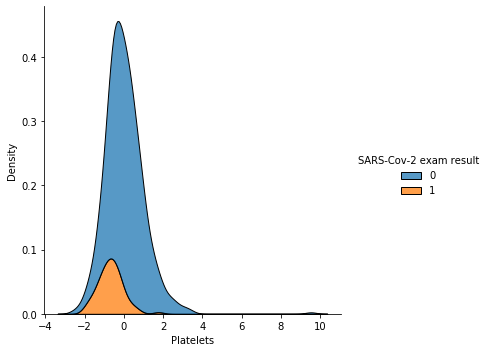

<Figure size 864x576 with 0 Axes>

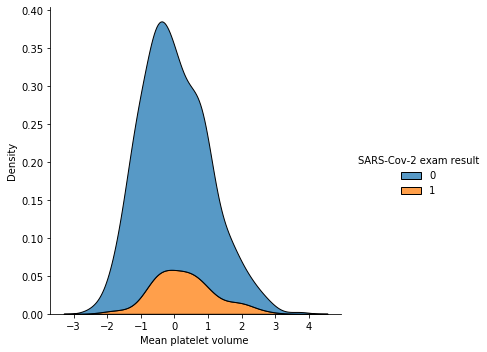

<Figure size 864x576 with 0 Axes>

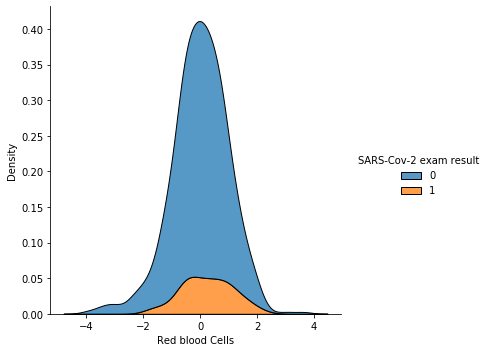

<Figure size 864x576 with 0 Axes>

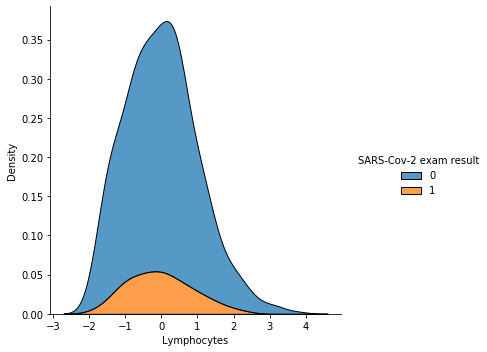

<Figure size 864x576 with 0 Axes>

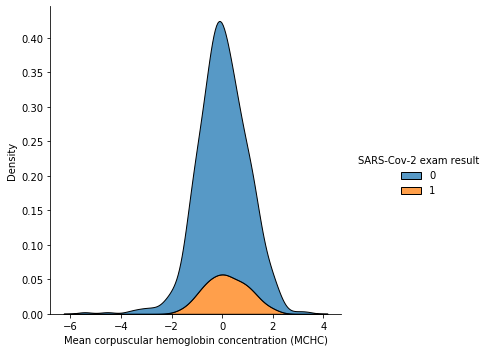

<Figure size 864x576 with 0 Axes>

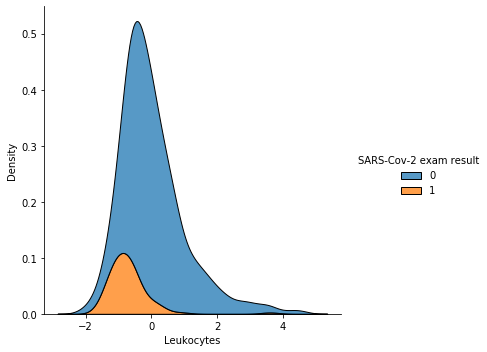

<Figure size 864x576 with 0 Axes>

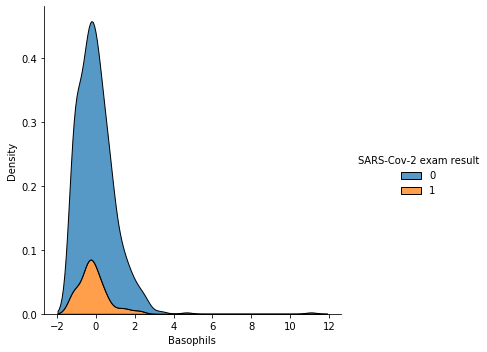

<Figure size 864x576 with 0 Axes>

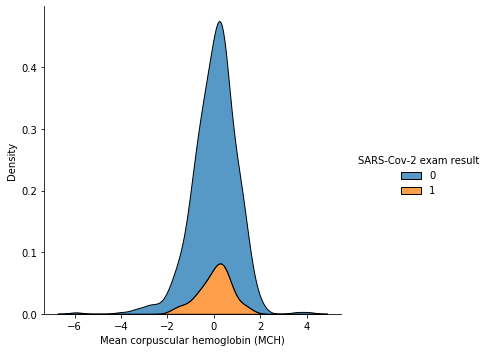

<Figure size 864x576 with 0 Axes>

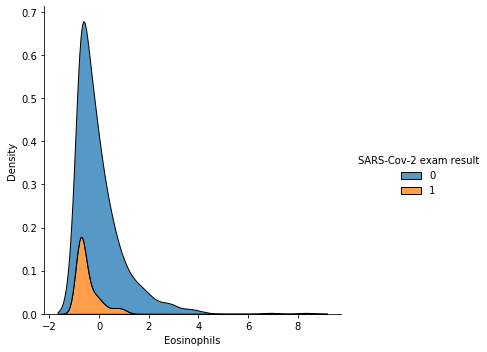

<Figure size 864x576 with 0 Axes>

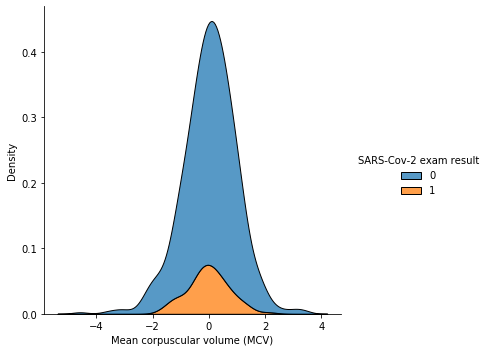

<Figure size 864x576 with 0 Axes>

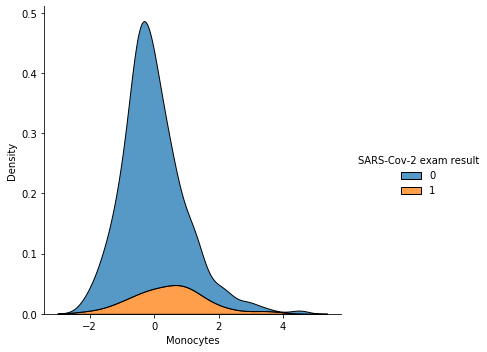

<Figure size 864x576 with 0 Axes>

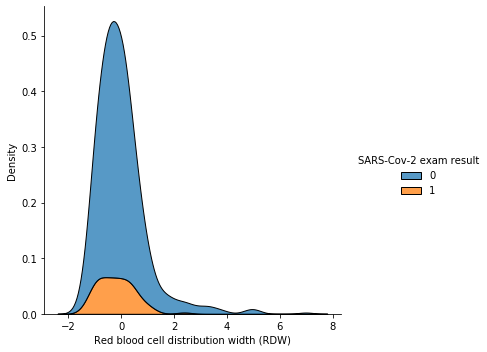

In [15]:
.'import seaborn as sns
import matplotlib.pyplot as plt

for i in Feature:
    plt.figure(figsize=(12,8))
    sns.displot(df_covid,x = i, hue = df_covid['SARS-Cov-2 exam result'],kind = "kde", multiple = 'stack')
    plt.show()
    
    

## Naive Bayes

#### Generating model using GauusianNB

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [17]:
naives_model = GaussianNB()
naives_model.fit(X_train,Y_train)

GaussianNB()

In [18]:
Y_hat = naives_model.predict(X_test)
Y_hat

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [19]:
model_acc = accuracy_score(Y_test, Y_hat)
print('The accuracy of our naive model is: %0.2f'% model_acc)

The accuracy of our naive model is: 0.72


#### Output probablity for 5 test samples of covid-19 

In [20]:
model_prob = naives_model.predict_proba(X_test[:5])
print('The accuracy of probablity for naives_model is:\n', model_prob)

The accuracy of probablity for naives_model is:
 [[1.00000000e+00 4.42916860e-16]
 [9.89862419e-01 1.01375808e-02]
 [2.63326905e-01 7.36673095e-01]
 [2.13606692e-01 7.86393308e-01]
 [9.93587516e-01 6.41248432e-03]]


#### Create confusion matrix and its Heatmap

The accuracy of our confusion matrix is:
 [[78 29]
 [ 5  8]]


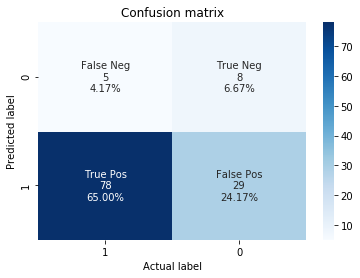

In [21]:
model_conf = confusion_matrix(Y_test, Y_hat)
model_conf
print('The accuracy of our confusion matrix is:\n', model_conf)
group_names = ['True Pos','False Pos','False Neg','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                model_conf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     model_conf.flatten()/np.sum(model_conf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(model_conf, annot=labels, fmt='', cmap='Blues')
plt.xticks([0.5,1.5],labels=[1,0])
plt.yticks([0.5,1.5],labels=[1,0])
ax.set_ylim([0,2])
plt.title('Confusion matrix')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show()


Feature: Patient age quantile Score: -0.03167
Feature: Hematocrit Score: -0.06667
Feature: Hemoglobin Score: -0.06000
Feature: Platelets Score: -0.06000
Feature: Mean platelet volume  Score: -0.03167
Feature: Red blood Cells Score: -0.05667
Feature: Lymphocytes Score: -0.01833
Feature: Mean corpuscular hemoglobin concentration (MCHC) Score: -0.01167
Feature: Leukocytes Score: -0.01667
Feature: Basophils Score: -0.00333
Feature: Mean corpuscular hemoglobin (MCH) Score: -0.03000
Feature: Eosinophils Score: -0.01333
Feature: Mean corpuscular volume (MCV) Score: -0.03500
Feature: Monocytes Score: -0.02667
Feature: Red blood cell distribution width (RDW) Score: -0.01000


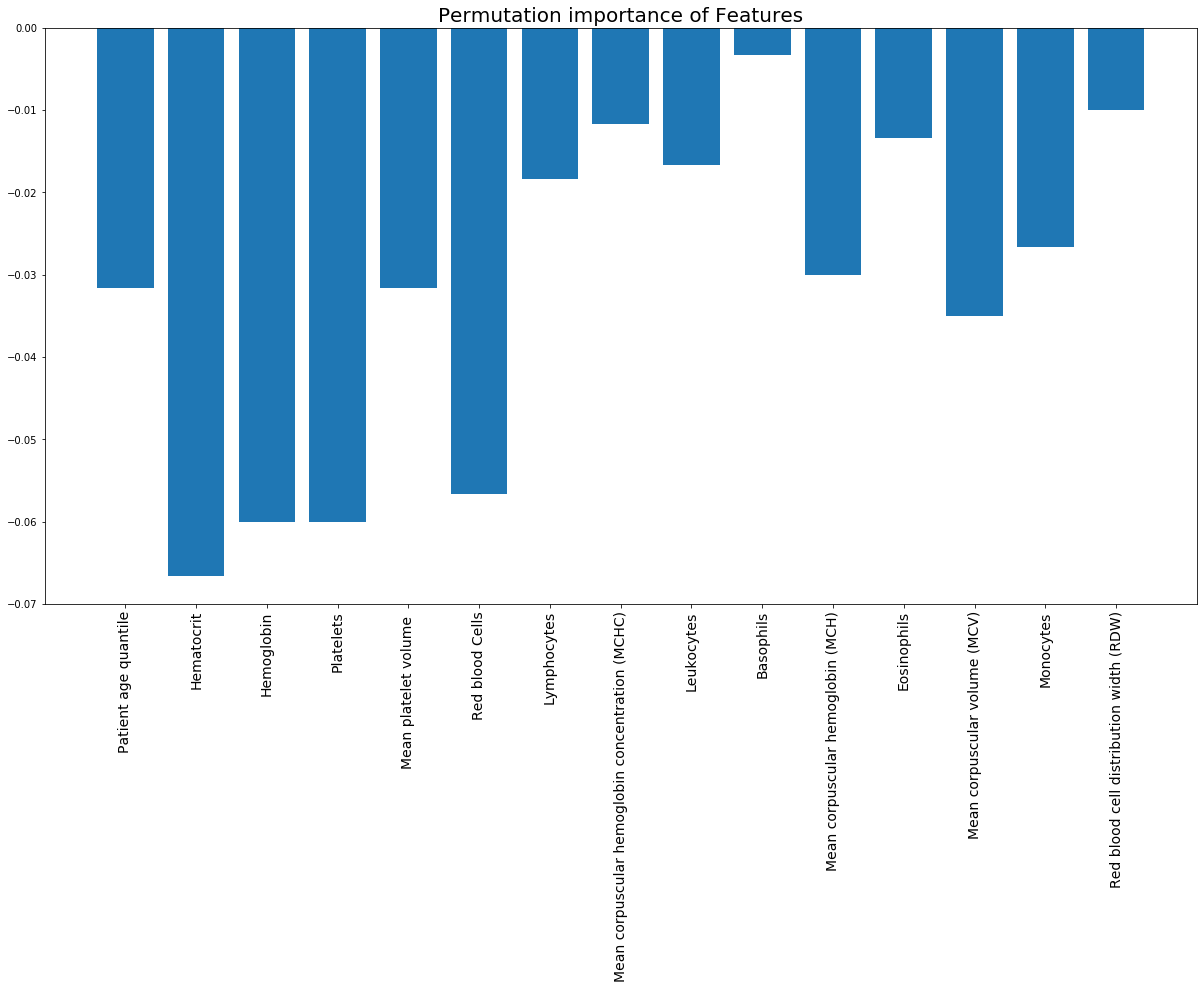

In [138]:
from matplotlib import pyplot
from sklearn.inspection import permutation_importance
imps = permutation_importance(naives_model, X_test, Y_test, scoring='accuracy')
imp = imps.importances_mean
for i,v in zip(Feature,imp):
    print('Feature:',i, 'Score: %.5f' % (v))
# plot feature importance
fig = plt.figure(figsize=(16,8))
ax = fig.add_axes([0,0,1,1])
ax.bar(Feature, imp)
plt.xticks(Feature, rotation='vertical', size=14)
plt.title("Permutation importance of Features", size=20)
plt.show()

In [144]:
x = df_covid[['Leukocytes','Lymphocytes','Eosinophils','Red blood cell distribution width (RDW)' ]].values
y = df_covid[['SARS-Cov-2 exam result']].values

In [145]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print('x_train:',x_train.shape,'\ny_train:',y_train.shape)
print('x_test:',x_test.shape,'\ny_test:',y_test.shape)

x_train: (478, 4) 
y_train: (478, 1)
x_test: (120, 4) 
y_test: (120, 1)


In [146]:
naives_model_1 = GaussianNB()
naives_model_1.fit(x_train,y_train.ravel())

GaussianNB()

In [147]:
y_hat = naives_model_1.predict(x_test)
y_hat

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [148]:
model_acc_1 = accuracy_score(y_test, y_hat)
print('The accuracy of our naive model is: %0.3f'% model_acc_1)

The accuracy of our naive model is: 0.842


The accuracy of our confusion matrix is:
 [[98  9]
 [13  0]]


<Figure size 864x576 with 0 Axes>

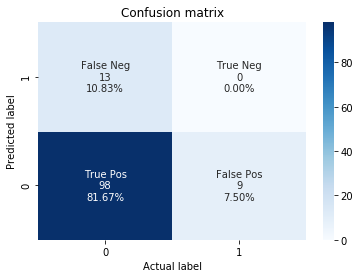

In [113]:
model_conf_1 = confusion_matrix(y_test, y_hat)
print('The accuracy of our confusion matrix is:\n', model_conf_1)
plt.figure(figsize=(12,8))
group_names = ['True Pos','False Pos','False Neg','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                model_conf_1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     model_conf_1.flatten()/np.sum(model_conf_1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(model_conf_1, annot=labels, fmt='', cmap='Blues')
ax.set_ylim([0,2])
plt.title('Confusion matrix')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show()


In [68]:
model_prob_1 = naives_model_1.predict_proba(x_test[:5])
print('The accuracy of probablity for naives_model is:\n', model_prob_1)

The accuracy of probablity for naives_model is:
 [[1.00000000e+00 1.84239991e-13]
 [5.56846617e-01 4.43153383e-01]
 [8.51121812e-01 1.48878188e-01]
 [4.78450316e-01 5.21549684e-01]
 [9.22274064e-01 7.77259359e-02]]


#### 6(a) Report the confusion matrix and probability for your “full model” and “feature selected model(s)”.

## Bayesian Network

### Converting the attributes to a discrete variable using binning approach

In [30]:
from sklearn.preprocessing import KBinsDiscretizer
discrete = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_train_binned = discrete.fit_transform(X_train)
X_test_binned = discrete.transform(X_test)

In [31]:
train_data = np.concatenate([X_train_binned, Y_train.reshape(-1, 1)], axis=1)
test_data = np.concatenate([X_test_binned, np.empty_like(Y_test).reshape(-1, 1)], axis=1)
test_data[:, -1] = np.nan

### Bayesian net using exact search to get the structure of nodes

In [32]:
from pomegranate import *

In [33]:
model = BayesianNetwork.from_samples(train_data, algorithm='exact')


In [34]:
result = np.array(model.predict(test_data))
prediction = result[:, -1].astype(int)
print('prediction: ',prediction)

prediction:  [0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0]


### The confusion matrix of the Bayesian Net

Confusion Matrix:
 [[101   6]
 [  8   5]]


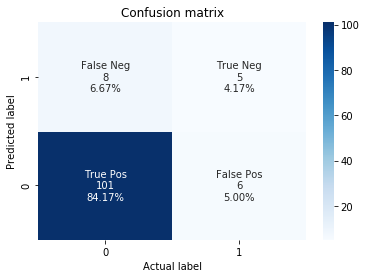

In [106]:
model_conf_2 = confusion_matrix(Y_test, prediction)
print('Confusion Matrix:\n', model_conf_2)

group_names = ['True Pos','False Pos','False Neg','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                model_conf_2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     model_conf_2.flatten()/np.sum(model_conf_2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(model_conf_2, annot=labels, fmt='', cmap='Blues')
ax.set_ylim([0,2])
plt.title('Confusion matrix')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show()

In [36]:
print('test score: {:4.2f}%'.format(accuracy_score(Y_test, prediction) * 100))

test score: 88.33%


### Probabilities for 5 test samples

In [102]:
test_sample = np.concatenate([X_test_binned, (Y_test).reshape(-1, 1)], axis=1)
test_sample[:, -1] = np.nan
probs = model.predict_proba(test_sample)
for i in range(5):
    print('Sample {} Positive Probability: {:4.2f} %'.format (i,probs[i][-1].parameters[0][1] * 100))

Sample 0 Positive Probability: 1.13 %
Sample 1 Positive Probability: 72.75 %
Sample 2 Positive Probability: 31.88 %
Sample 3 Positive Probability: 16.61 %
Sample 4 Positive Probability: 1.13 %


In [103]:
# find the probability of having Covid-19 given input sample
sample = [[3.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 3.0, 3.0, 2.0, 3.0, 1.0, 0.0, None]]
sample_prob = model.predict_proba(sample)
print('\nSample probability to be positive Covid-19 is {:4.2f}%'.format(sample_prob[0][-1].parameters[0][1]*100))




Sample probability to be positive Covid-19 is 1.13%


In [104]:
sample = [[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 1]]
sample_prob = model.predict_proba(sample)

print('\nSample probability to be positive Covid-19 is {:4.2f}%'.format(sample_prob[0][-1]))


Sample probability to be positive Covid-19 is 1.00%


#### What assumptions did we make for this model?

 As for bayesian network, we assumed that probability of one parameter would affect the other. We assumed that the parameters are dependent on each other.

#### What other approaches, or modifications could we have done? In other words, what parameters can we change? (Note the suggested revisions may not necessarily be implemented in the library yet)

1)It would be good if the Bayesian network could accommodate NaN while predicting the other parameters. Its entirely possible that some data might go missing or noisy. But the model should be able to predict irrespective of the noisy data.

2) It would be good, if we remove the binning for predicting. Or it can be done internally within the function of Bayesian network prediction as it can be confusing.